In [1]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import r2_score, mean_absolute_error
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
import warnings
from sklearn.exceptions import FitFailedWarning
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv('C:/Users/19874/OneDrive/桌面/Machine Learning Project 1/IA_House_Price_Original_Data.csv')
# Note: NA will be treated as nan here 

In [3]:
data['Finished_basement'] = data['BsmtFinSF1'] + data['BsmtFinSF2']
data.fillna(0, inplace=True) 
# Replaces all NaN (Not a Number) or missing values in the DataFrame with 0.
# Note: When inplace=True, the operation is performed directly on the original DataFrame (data) rather than creating a new DataFrame. 
data['BsmtQual'] = data['BsmtQual'].map({0: 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5})

In [4]:
all_neighborhoods = data['Neighborhood'].unique()
print(all_neighborhoods)

['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']


# Data Clearning Process

In [ ]:


my_transformation = ColumnTransformer(transformers=[('Normal_Scaling', StandardScaler(),['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 
            'Finished_basement', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
            'GrLivArea', 'FullBath', 'HalfBath','BedroomAbvGr' ,'TotRmsAbvGrd', 
            'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 
            'EnclosedPorch', 'BsmtQual']),('One_Hot_Encoder', OneHotEncoder(categories=[all_neighborhoods]),['Neighborhood'])])

# Categories=[all_neighborhoods is important!
# It ensures that the same set of one-hot encoded columns is created in every transformation, regardless of whether a certain neighborhood is present in the current dataset.
# For example, if my current dataset only contains 'CollgCr', 'Crawfor', and 'Somerst', the encoder will still generate 25 columns with binary values (0 or 1) corresponding to whether a given neighborhood is present or not for each row.
transformed_data = my_transformation.fit_transform(data)

original_data_info_check_1 = my_transformation.named_transformers_['Normal_Scaling'].mean_
original_data_info_check_2 = my_transformation.named_transformers_['Normal_Scaling'].var_
print(original_data_info_check_1,original_data_info_check_2)
# This step tells me the original mean and variance of the raw data that belongs to the transformation named 'Normal_Scaling' before the transformation happens.

encoded_columns = my_transformation.named_transformers_['One_Hot_Encoder'].get_feature_names_out(['Neighborhood'])
# .named_transformers_[] is to locate which transformation we are dealing with right now. 
# get_feature_names_out() is to extract the feature names

print(encoded_columns)


In [6]:
all_features = ['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 
            'Finished_basement', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
            'GrLivArea', 'FullBath', 'HalfBath','BedroomAbvGr' ,'TotRmsAbvGrd', 
            'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 
            'EnclosedPorch', 'BsmtQual']+ list(encoded_columns)
print(all_features)
print(f"There are {len(all_features)} features in total in our model")


['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'Finished_basement', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'BsmtQual', 'Neighborhood_CollgCr', 'Neighborhood_Veenker', 'Neighborhood_Crawfor', 'Neighborhood_NoRidge', 'Neighborhood_Mitchel', 'Neighborhood_Somerst', 'Neighborhood_NWAmes', 'Neighborhood_OldTown', 'Neighborhood_BrkSide', 'Neighborhood_Sawyer', 'Neighborhood_NridgHt', 'Neighborhood_NAmes', 'Neighborhood_SawyerW', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Edwards', 'Neighborhood_Timber', 'Neighborhood_Gilbert', 'Neighborhood_StoneBr', 'Neighborhood_ClearCr', 'Neighborhood_NPkVill', 'Neighborhood_Blmngtn', 'Neighborhood_BrDale', 'Neighborhood_SWISU', 'Neighborhood_Blueste']
There are 47 features in total in our model


In [7]:
Features = ['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 
            'Finished_basement', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
            'GrLivArea', 'FullBath', 'HalfBath','BedroomAbvGr' ,'TotRmsAbvGrd', 
            'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 
            'EnclosedPorch', 'BsmtQual', 'Neighborhood']
Target = ['SalePrice']
X = data[Features]
y = data[Target]

In [8]:
X_train,X_rem,y_train,y_rem = train_test_split(X,y,train_size = 1800, random_state = 42)
y_train = y_train.values.ravel()
# Convert it into 1D arrays
# Many scikit-learn models, such as LASSO, Ridge, and Random Forest, expect the target variable to be in a specific format: a 1D array with the shape (n_samples,)

X_val, X_test, y_val,y_test = train_test_split(X_rem, y_rem, test_size = 608, random_state = 42)
y_val = y_val.values.ravel()
y_test = y_test.values.ravel()

In [9]:
X_train_transformed = my_transformation.fit_transform(X_train)
X_val_transformed = my_transformation.transform(X_val)
X_test_transformed = my_transformation.transform(X_test)
print(X_train_transformed)

# One of the most important steps!!

# First of all, feature scaling, or standardization, only scales features, not target value! Special case: if the target value has a extremely large raneg, then it might get scaled. 

# .fit_transform() ensures that the trained data is learned for the transformation and fits for it
# .fit_transform(X_train) learns the transformations from X_train (training data) and applies them to X_train
# .transform(X_val) Applies the same transformations (already learned from X_train) to X_val without learning anything new from X_val

# Do NOT use .fit_transform() on X_val and X_test!!

# If you use .fit_transform() on both the training and test sets, the model calculates the mean and standard deviation for the test set separately. 

[[ 0.29266545 -1.46924426 -0.52437767 ...  0.          0.
   0.        ]
 [ 0.00675363 -0.0512069  -0.52437767 ...  0.          0.
   0.        ]
 [-0.3054699   0.65781177 -0.52437767 ...  0.          0.
   0.        ]
 ...
 [-0.02541959 -0.0512069  -1.42331082 ...  0.          0.
   0.        ]
 [-0.83626293 -0.0512069  -0.52437767 ...  0.          0.
   0.        ]
 [-0.05511795 -0.0512069  -0.52437767 ...  0.          0.
   0.        ]]


# Model Application

In [10]:
ridge_alpha = [0.10, 0.30, 0.60]
for ridge_α in ridge_alpha:
    ridge_model = Ridge(alpha = ridge_α, max_iter = 100000)
    ridge_model.fit(X_train_transformed, y_train)
    y_val_pred_ridge = ridge_model.predict(X_val_transformed)
    y_test_pred_ridge = ridge_model.predict(X_test_transformed)
    ridge_coefficients = ridge_model.coef_

    ridge_val_mae = mean_absolute_error(y_val, y_val_pred_ridge)
    ridge_val_r2= r2_score(y_val, y_val_pred_ridge)
    print(f"The MAE for ridge model(val set) with alpha = {ridge_α} is {ridge_val_mae}")
    print(f"The r2 value for ridge model (val set) with alpha = {ridge_α} is {ridge_val_r2}")
    print('---------------------------------------------')

    ridge_test_mae = mean_absolute_error(y_test, y_test_pred_ridge)
    ridge_test_r2 = r2_score(y_test, y_test_pred_ridge)
    print(f"The MAE for ridge model(test set) with alpha = {ridge_α} is {ridge_test_mae}")
    print(f"The r2 value for ridge model (test set) with alpha = {ridge_α} is {ridge_test_r2}")
    print('---------------------------------------------')
    print(f"The coefficients in this model with alpha = {ridge_α} are {ridge_coefficients}")



The MAE for ridge model(val set) with alpha = 0.1 is 19103.854746078512
The r2 value for ridge model (val set) with alpha = 0.1 is 0.8732987164333107
---------------------------------------------
The MAE for ridge model(test set) with alpha = 0.1 is 16703.46900576187
The r2 value for ridge model (test set) with alpha = 0.1 is 0.900521621327811
---------------------------------------------
The coefficients in this model with alpha = 0.1 are [  5140.44361889  17157.25696502   5956.07218389  11001.1127721
   3781.12896314   9050.56065526  -1404.47633915   8440.3916408
  15044.54561015  14307.40691051   8665.56693864   -218.29654193
    378.87640234  -5940.65325242   3243.21028336   2987.7172817
    -41.52358055   7176.00149135    870.83148737    691.46824653
    -40.20460404   2136.38680334  -1164.98425809 -14611.67869324
  16716.9800042   30496.59174846 -11893.78013597   7761.05498601
 -15252.13830636  -4403.79427038   8705.78339551  -5459.10568494
  39717.6432253   -5519.41894806  -9868

In [11]:
lasso_alpha = [0.02, 0.06, 0.10]
for lasso_α in lasso_alpha:
    lasso_model = Lasso(alpha = lasso_α, max_iter = 100000)
    lasso_model.fit(X_train_transformed, y_train)
    y_val_pred_lasso = lasso_model.predict(X_val_transformed)
    y_test_pred_lasso = lasso_model.predict(X_test_transformed)

    lasso_val_mae = mean_absolute_error(y_val_pred_lasso, y_val)
    lasso_val_r2 = r2_score(y_val_pred_lasso, y_val)
    lasso_coefficients = lasso_model.coef_
    print(f"The MAE for LASSO model(val set) with alpha = {lasso_α } is {lasso_val_mae}")
    print(f"The r2 value for ridge model (val set) with alpha = {lasso_α } is {lasso_val_r2}")
    print('---------------------------------------------')


    lasso_test_mae = mean_absolute_error(y_test_pred_lasso, y_test)
    lasso_test_r2 = r2_score(y_test_pred_lasso, y_test)
    print(f"The MAE for LASSO model(test set) with alpha = {lasso_α } is {lasso_test_mae}")
    print(f"The r2 value for ridge model (test set) with alpha = {lasso_α } is {lasso_test_r2}")
    print('---------------------------------------------')
    print(f"The coefficients in this model with alpha = {lasso_α } are {lasso_coefficients}")

The MAE for LASSO model(val set) with alpha = 0.02 is 19105.022293103742
The r2 value for ridge model (val set) with alpha = 0.02 is 0.8302240381961998
---------------------------------------------
The MAE for LASSO model(test set) with alpha = 0.02 is 16700.694779284695
The r2 value for ridge model (test set) with alpha = 0.02 is 0.8826910565941277
---------------------------------------------
The coefficients in this model with alpha = 0.02 are [ 5.13745855e+03  1.71475077e+04  5.96043698e+03  1.10003061e+04
  3.77610765e+03  1.41089346e+04  3.41160744e+03  3.81608913e+03
  1.51078979e+04  1.43797117e+04  8.57639208e+03 -2.17835052e+02
  3.80731742e+02 -5.93789010e+03  3.24203564e+03  2.99082706e+03
 -4.31208167e+01  7.17315093e+03  8.73479063e+02  6.91338075e+02
 -4.04554236e+01  2.13259839e+03  2.87693029e+03 -1.06516178e+04
  2.07672389e+04  3.46247171e+04 -7.88469764e+03  1.18214296e+04
 -1.12395330e+04 -3.94187346e+02  1.27230185e+04 -1.45108158e+03
  4.38296355e+04 -1.50644161e

In [12]:
# Plot the Ridge model's coefficients using alpha = 0.3

# Find the optimized parameters for Ridge Regression 

In [14]:
ridge = Ridge()
param_dist_1 = {
    'alpha': [0.1, 0.3, 0.6],       # Regularization strength (higher alpha means stronger regularization)
    'fit_intercept': [True, False],          # Whether to fit the intercept or not
    'solver': ['auto', 'svd', 'cholesky', 'saga'],  # Solver algorithm to use
    'max_iter': [1000, 5000, 10000],         # Maximum iterations for the solver to converge
    'tol': [1e-3, 1e-4, 1e-5]               # Tolerance for convergence
}
ridge_random = RandomizedSearchCV(estimator=ridge, 
                                  param_distributions=param_dist_1, 
                                  n_iter=10,  # Number of random combinations to try
                                  cv=3,       # 3-fold cross-validation
                                  verbose=2, 
                                  random_state=42, 
                                  n_jobs=-1)  # Use all CPU cores
# Fit the RandomizedSearchCV to your data
ridge_random.fit(X_train_transformed, y_train)

# Get the best hyperparameters found
best_params = ridge_random.best_params_
print("Best Hyperparameters:", best_params)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Hyperparameters: {'tol': 0.001, 'solver': 'saga', 'max_iter': 10000, 'fit_intercept': True, 'alpha': 0.6}


In [15]:
ridge_model_plot = Ridge(
    alpha=best_params['alpha'],              
    max_iter=best_params['max_iter'],        
    solver=best_params['solver'],            
    tol=best_params['tol'],                  
    fit_intercept=best_params['fit_intercept'],  
    random_state=42                          
)
ridge_model_plot.fit(X_train_transformed, y_train)
ridge_model_plot_coef = ridge_model_plot.coef_.flatten()
print(type(ridge_model_plot_coef))
# It is an array here

<class 'numpy.ndarray'>


# Plotting the weights of each feature using optimized parameters

In [16]:
sorted_indices = np.argsort(np.abs(ridge_model_plot_coef))

# np.argsort sort the array in ascending order, here, it sorts the indices of the coefficents from the smallest to the largest.
print(sorted_indices)

sorted_features = np.array(all_features)[sorted_indices]
# Convert the list (all_features) to array first
sorted_coefficients = ridge_model_plot_coef[sorted_indices]

print(sorted_features)
print(sorted_coefficients)


[16 20 11 12 19 45 18 37  6 39 22 21 15 14 35  4 29 41  0 31  2 33 13 27
 17 30  7  5 38 43 10 34 46 36  3 26  9 44  8 23 28 24 42  1 40 25 32]
['GarageCars' 'EnclosedPorch' 'FullBath' 'HalfBath' 'OpenPorchSF'
 'Neighborhood_SWISU' 'WoodDeckSF' 'Neighborhood_Edwards' 'BsmtUnfSF'
 'Neighborhood_Gilbert' 'Neighborhood_CollgCr' 'BsmtQual' 'Fireplaces'
 'TotRmsAbvGrd' 'Neighborhood_IDOTRR' 'YearRemodAdd'
 'Neighborhood_OldTown' 'Neighborhood_ClearCr' 'LotArea'
 'Neighborhood_Sawyer' 'OverallCond' 'Neighborhood_NAmes' 'BedroomAbvGr'
 'Neighborhood_Somerst' 'GarageArea' 'Neighborhood_BrkSide' 'TotalBsmtSF'
 'Finished_basement' 'Neighborhood_Timber' 'Neighborhood_Blmngtn'
 'GrLivArea' 'Neighborhood_SawyerW' 'Neighborhood_Blueste'
 'Neighborhood_MeadowV' 'YearBuilt' 'Neighborhood_Mitchel' '2ndFlrSF'
 'Neighborhood_BrDale' '1stFlrSF' 'Neighborhood_Veenker'
 'Neighborhood_NWAmes' 'Neighborhood_Crawfor' 'Neighborhood_NPkVill'
 'OverallQual' 'Neighborhood_StoneBr' 'Neighborhood_NoRidge'
 'Neighbor

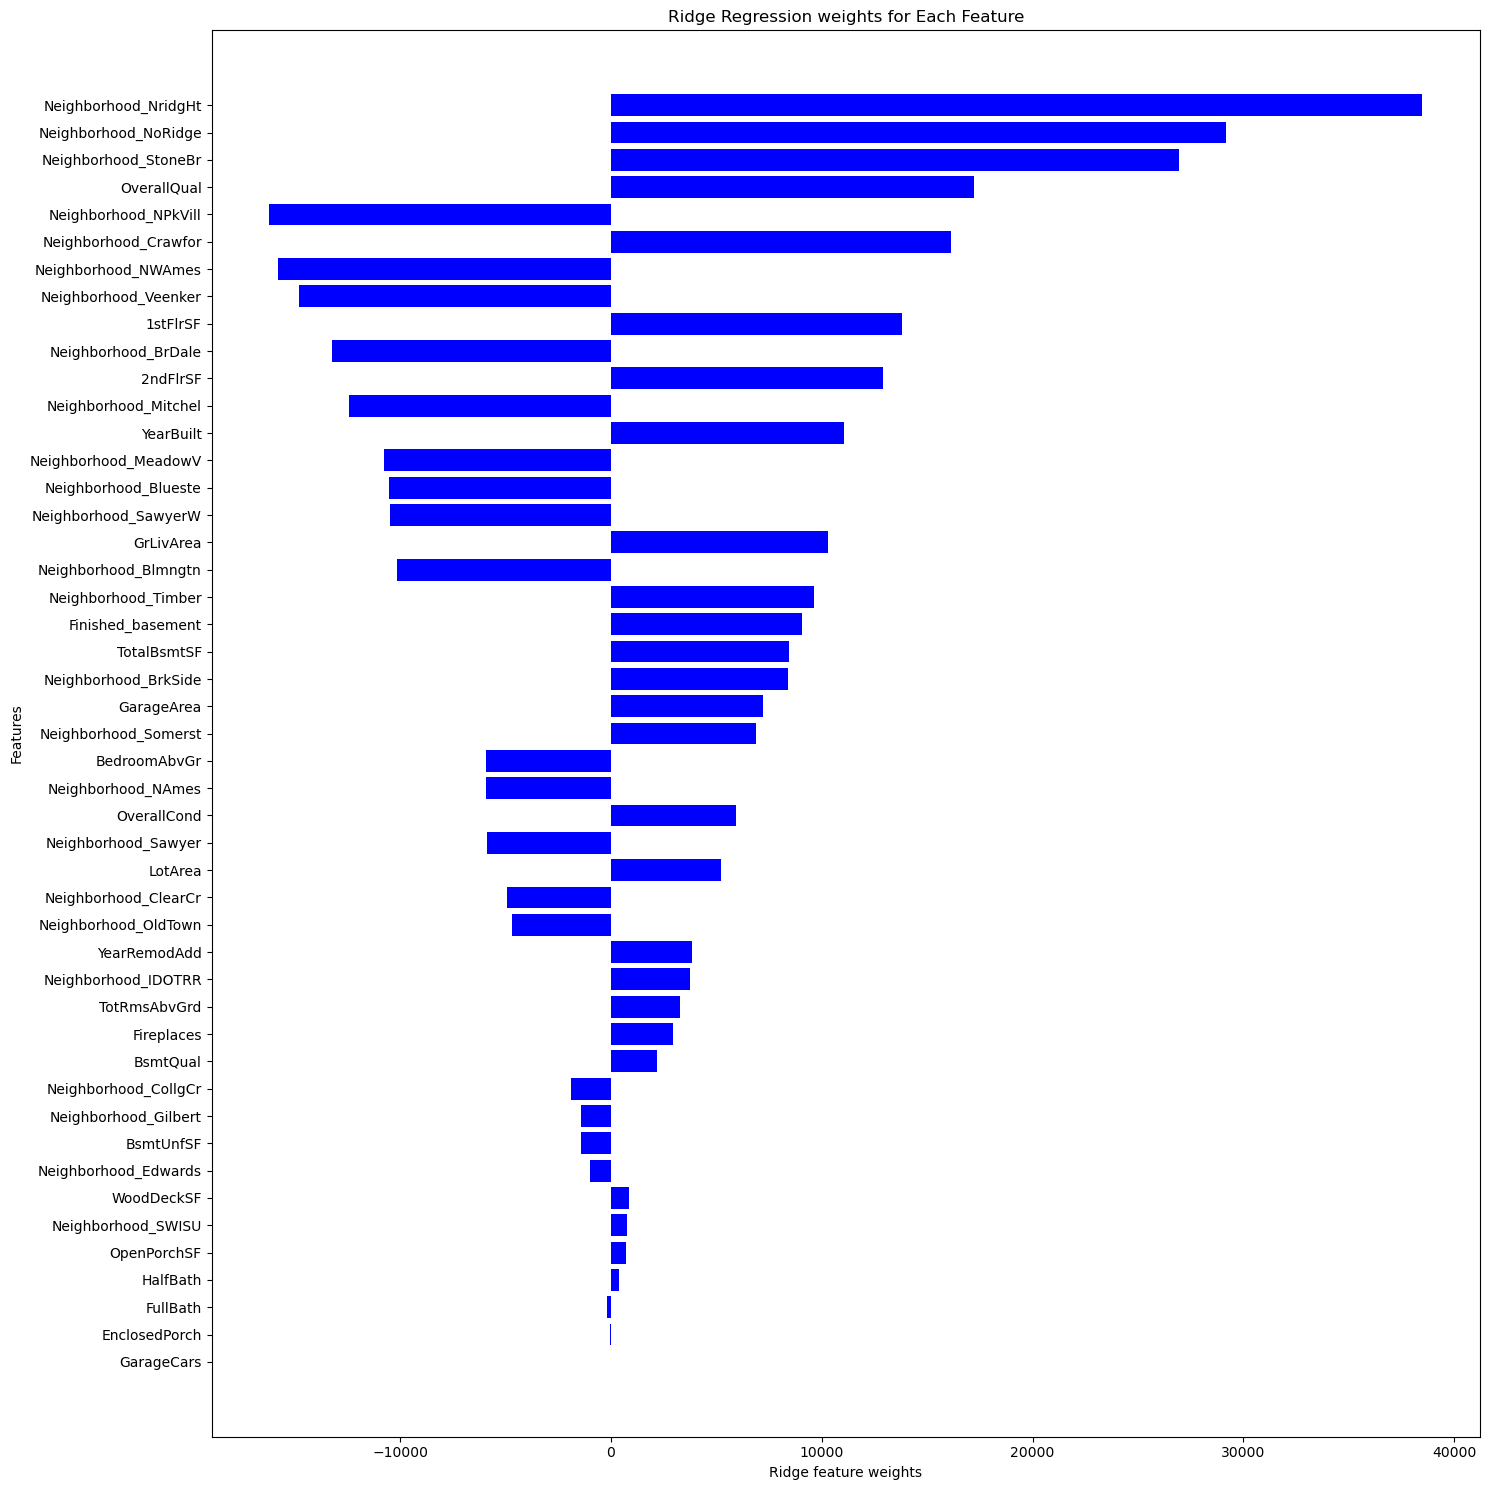

In [28]:
plt.figure(figsize = (15,15))
plt.barh(sorted_features, sorted_coefficients, color = 'blue')
plt.xlabel('Ridge feature weights')
plt.ylabel('Features')
plt.title('Ridge Regression weights for Each Feature')
plt.tight_layout()
plt.show()


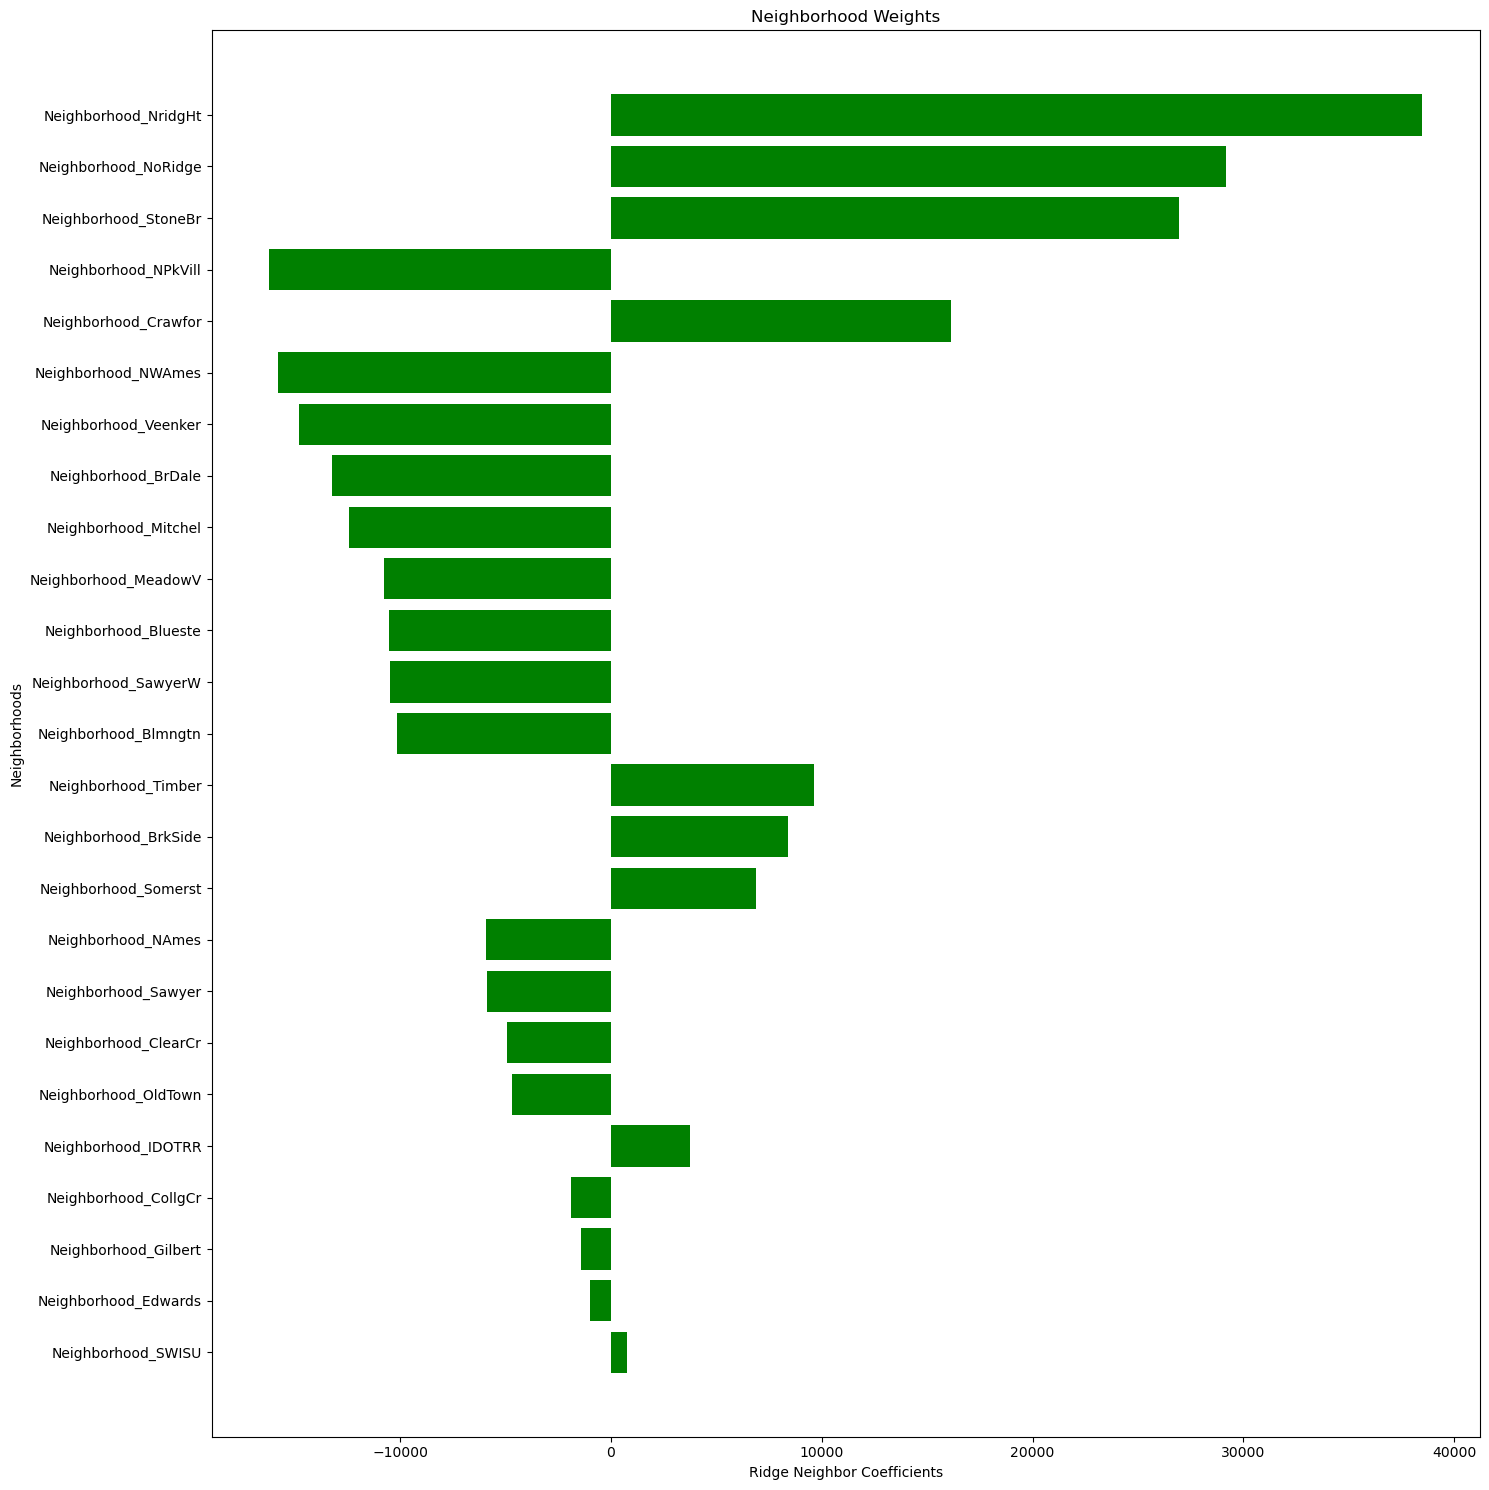

In [18]:
coef_dataframe = pd.DataFrame({'Feature':all_features, 'Coefficients':ridge_model_plot_coef})
neighbor_indices = coef_dataframe.index[-25:]

last_25_features = np.array(all_features)[neighbor_indices]
last_25_coefficients = ridge_model_plot_coef[neighbor_indices]
sort_index_1 = np.argsort(np.abs(last_25_coefficients))
last_25_features = last_25_features[sort_index_1]
last_25_coefficients = last_25_coefficients[sort_index_1]

plt.figure(figsize = (15,15))
plt.barh(last_25_features, last_25_coefficients,color = 'Green')
plt.xlabel('Ridge Neighbor Coefficients')
plt.ylabel('Neighborhoods')
plt.title('Neighborhood Weights')
plt.tight_layout()
plt.show()

# Random Forest Regression Forcasting 

In [26]:

# Feature Standardization will have no impacts on Random Forest 
# We can directly use the standardized features here


In [23]:
# Tune the Model, find which parameters to use:


rf = RandomForestRegressor()

# Define the hyperparameter space to search. We want to find out the optimized value for each parameter

param_dist = {
    'n_estimators': [100, 200, 500],       # Number of trees
    'max_depth': [10, 20, None],           # Depth of the trees
    'min_samples_split': [2, 5, 10],       # Minimum samples required to split a node
    'max_features': ['sqrt', 'log2'],      # Number of features to consider when splitting
    'bootstrap': [True, False],            # Whether to use bootstrap sampling
    'max_leaf_nodes': [None, 10, 20, 100], # Limit the number of leaf nodes
    'criterion': ['squared_error', 'absolute_error'], # Corrected criterion values
    'oob_score': [False, True],            # Out-of-bag score
    'random_state': [42]                   # For reproducibility
}

# Create the RandomizedSearchCV object. This is the searching process.
rf_random = RandomizedSearchCV(estimator=rf, 
                               param_distributions=param_dist, 
                               n_iter=10,  # Number of random combinations to try
                               cv=3,       # 3-fold cross-validation
                               verbose=2, 
                               random_state=42, 
                               n_jobs=-1)  # Use all CPU cores


# Fit the RandomizedSearchCV to your data
rf_random.fit(X_train_transformed, y_train)
best_params = rf_random.best_params_

# Get the best hyperparameters found
warnings.filterwarnings("ignore", category = FitFailedWarning)

# Why is there a warning?
# For bootstrap=True, oob_score=True is included, as Out-of-Bag evaluation can only be used when bootstrap sampling is enabled.
# For bootstrap=False, oob_score=False is forced, as Out-of-Bag evaluation cannot be used without bootstrap sampling.
# If you ignore the warning and proceed with the results, the 6 fits that failed (out of 30 total fits) will be marked as NaN, meaning they will not contribute to the model evaluation.
# The valid fits will still be used to determine the best hyperparameters.
print("Best Hyperparameters:", best_params)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Hyperparameters: {'random_state': 42, 'oob_score': False, 'n_estimators': 500, 'min_samples_split': 10, 'max_leaf_nodes': 100, 'max_features': 'log2', 'max_depth': None, 'criterion': 'squared_error', 'bootstrap': False}


In [24]:
rf_regressor = RandomForestRegressor(
    n_estimators=best_params['n_estimators'],            
    min_samples_split=best_params['min_samples_split'],  
    max_features=best_params['max_features'],            
    max_depth=best_params['max_depth'],                  
    bootstrap=best_params['bootstrap'],                  
    max_leaf_nodes=best_params.get('max_leaf_nodes', None),  
    min_samples_leaf=best_params.get('min_samples_leaf', 1), 
    criterion=best_params.get('criterion', 'squared_error'),  
    oob_score=best_params.get('oob_score', False),           
    random_state=best_params['random_state']        
)

rf_regressor.fit(X_train_transformed, y_train)
y_val_pred_rf = rf_regressor.predict(X_val_transformed)


In [25]:
y_test_pred_rf = rf_regressor.predict(X_test_transformed)
rf_mae_test = mean_absolute_error(y_test, y_test_pred_rf)
rf_r2_test = r2_score(y_test,y_test_pred_rf)
n_trees = best_params['n_estimators']
print(f"After planting {n_trees} trees, the MAE of the testing set is {rf_mae_test} dollars, and the r2 is {rf_r2_test}")

After planting 500 trees, the MAE of the testing set is 16523.505944665903 dollars, and the r2 is 0.9053976519365597
